**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [2]:
cd /home/jovyan/Documents/GA_DSI/Projects/Project_2_housing/data

/home/jovyan/Documents/GA_DSI/Projects/Project_2_housing/data


In [3]:
housing = pd.read_csv('train.csv')

In [4]:
df = pd.DataFrame(housing)

In [5]:
df.shape

(1460, 81)

In [6]:
df.set_index('Id', inplace=True)

In [7]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [9]:
assert(df.shape == (1460, 80))

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [10]:
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [11]:
df.get_dtype_counts()

float64     3
int64      33
object     44
dtype: int64

### B. Plot histograms of the numeric columns. 

In [12]:
# df_num = df.select_dtypes(include = ['int','float'])

In [13]:
df_num = pd.DataFrame()
df_cat = pd.DataFrame()

In [14]:
for col in df:
    if df[col].dtypes == 'int' and len(df[col].unique()) >= 10:
        df_num[col] = df[col].values
    elif df[col].dtypes == 'float' and len(df[col].unique()) >= 10:
        df_num[col] = df[col].values
    else:
        df_cat[col] = df[col].values

In [15]:
df_num.head(2)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,...,2003.0,548,0,61,0,0,0,0,2,208500
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,...,1976.0,460,298,0,0,0,0,0,5,181500


In [16]:
df_cat.head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,NaN,NaN,NaN,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,0,NaN,NaN,NaN,2007,WD,Normal


In [17]:
len(df_num.columns), len(df_cat.columns)

(25, 55)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc1979de48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc18de9a90>]], dtype=object)

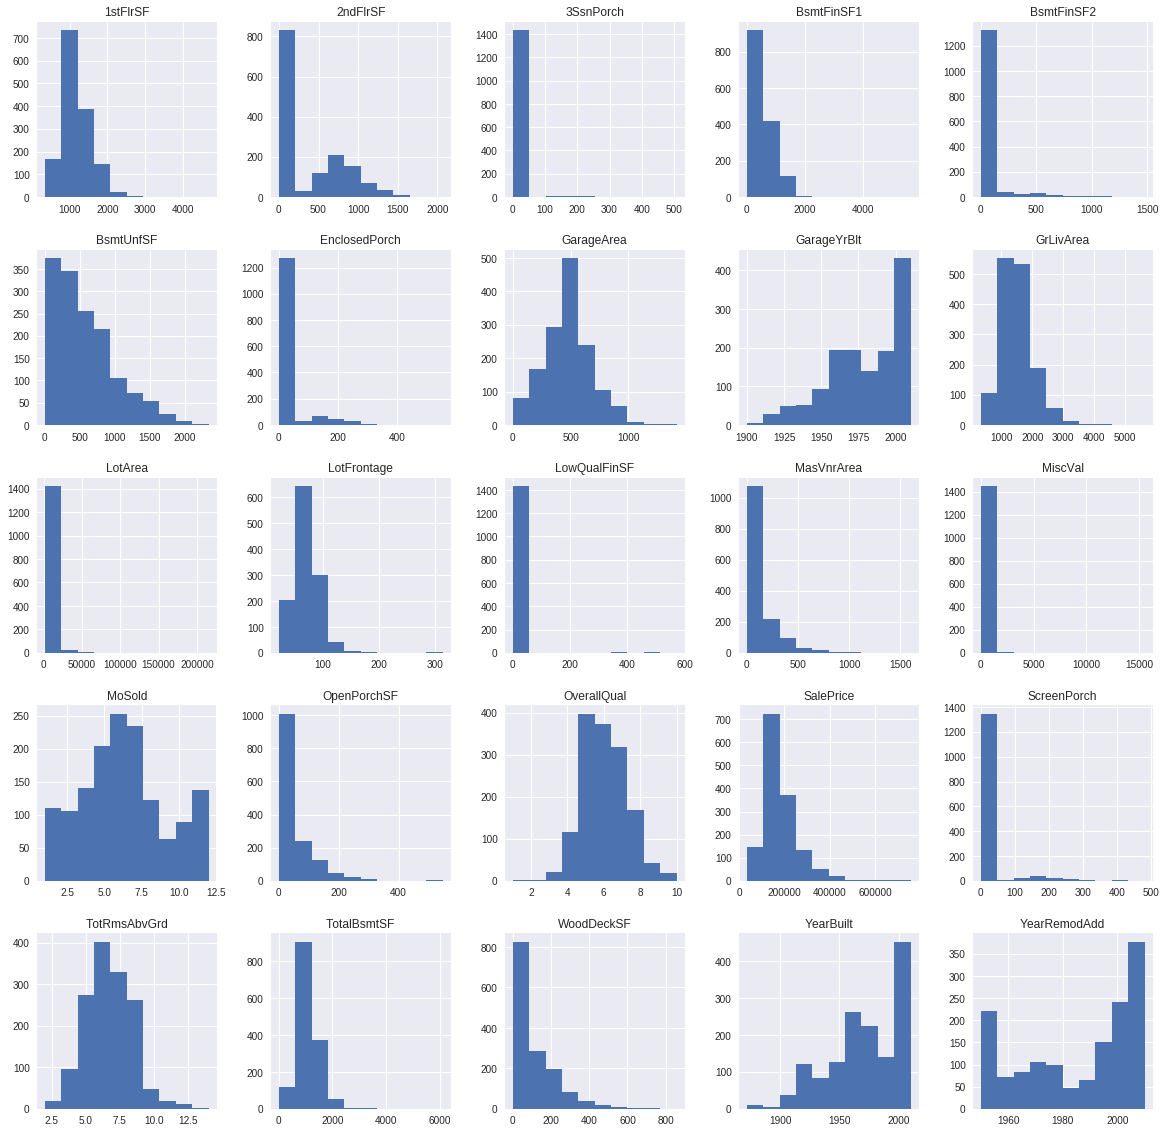

In [18]:
df_num.hist(layout = (5, 5), figsize = (20,20))

In [19]:
df_num.isnull().head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df_num_corr = df_num.corr()

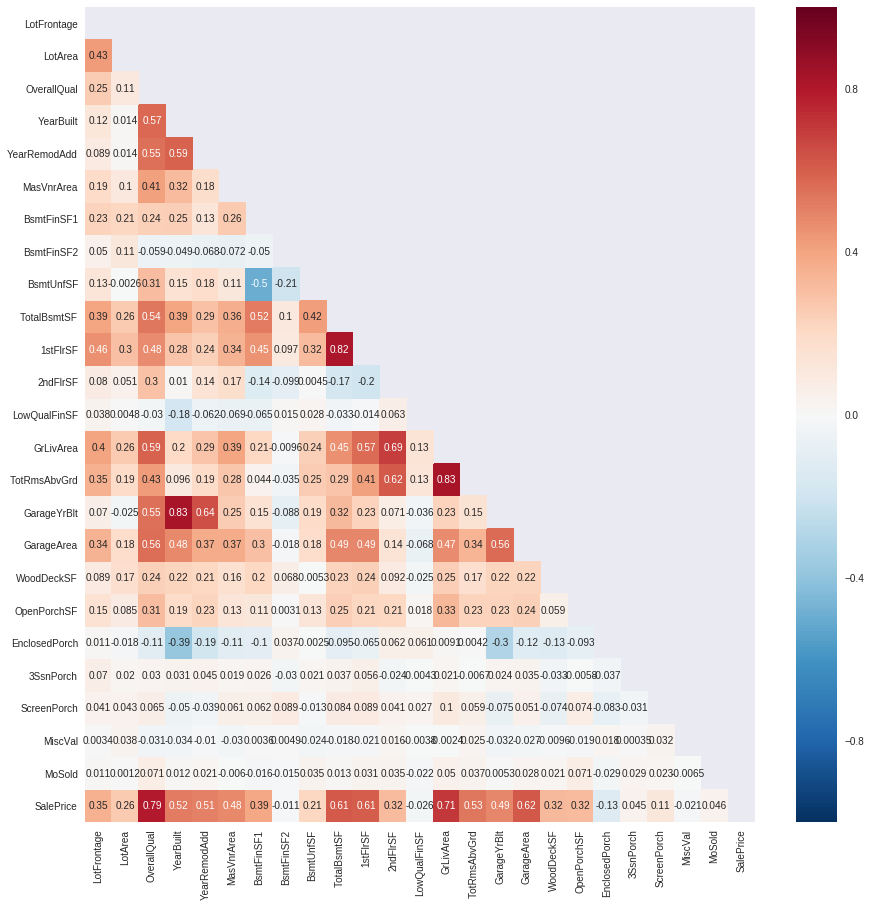

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))

mask = np.zeros_like(df_num_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_num_corr, mask = mask, ax = ax, annot = True)

#### What are your observations? Add them to this markdown cell.
- Total rooms above ground, overall quality, and garage area are closest to normal distribution
- SalesPrice is most strongly correlated to overall quality, with GrLivArea , GarageArea, TotalBsmntSF, and 1stFlrSF being strong correlators as well
- Many of the square footage columns are skewed right
---



### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

In [22]:
len(df_num.columns)

25

In [23]:
SalePrice = df_num['SalePrice']

In [24]:
def show_data_with_labels(column_vals):
    fig, axes = plt.subplots(5, 5, figsize=(20,20))
    columns = list(df_num)
    cols_combo = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            col1 = columns[cols_combo]
            ax.scatter(df_num[col1], column_vals)
            ax.set_xlabel(col1)
            ax.set_ylabel(column_vals.name)
            cols_combo += 1
    plt.tight_layout()
    fig.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


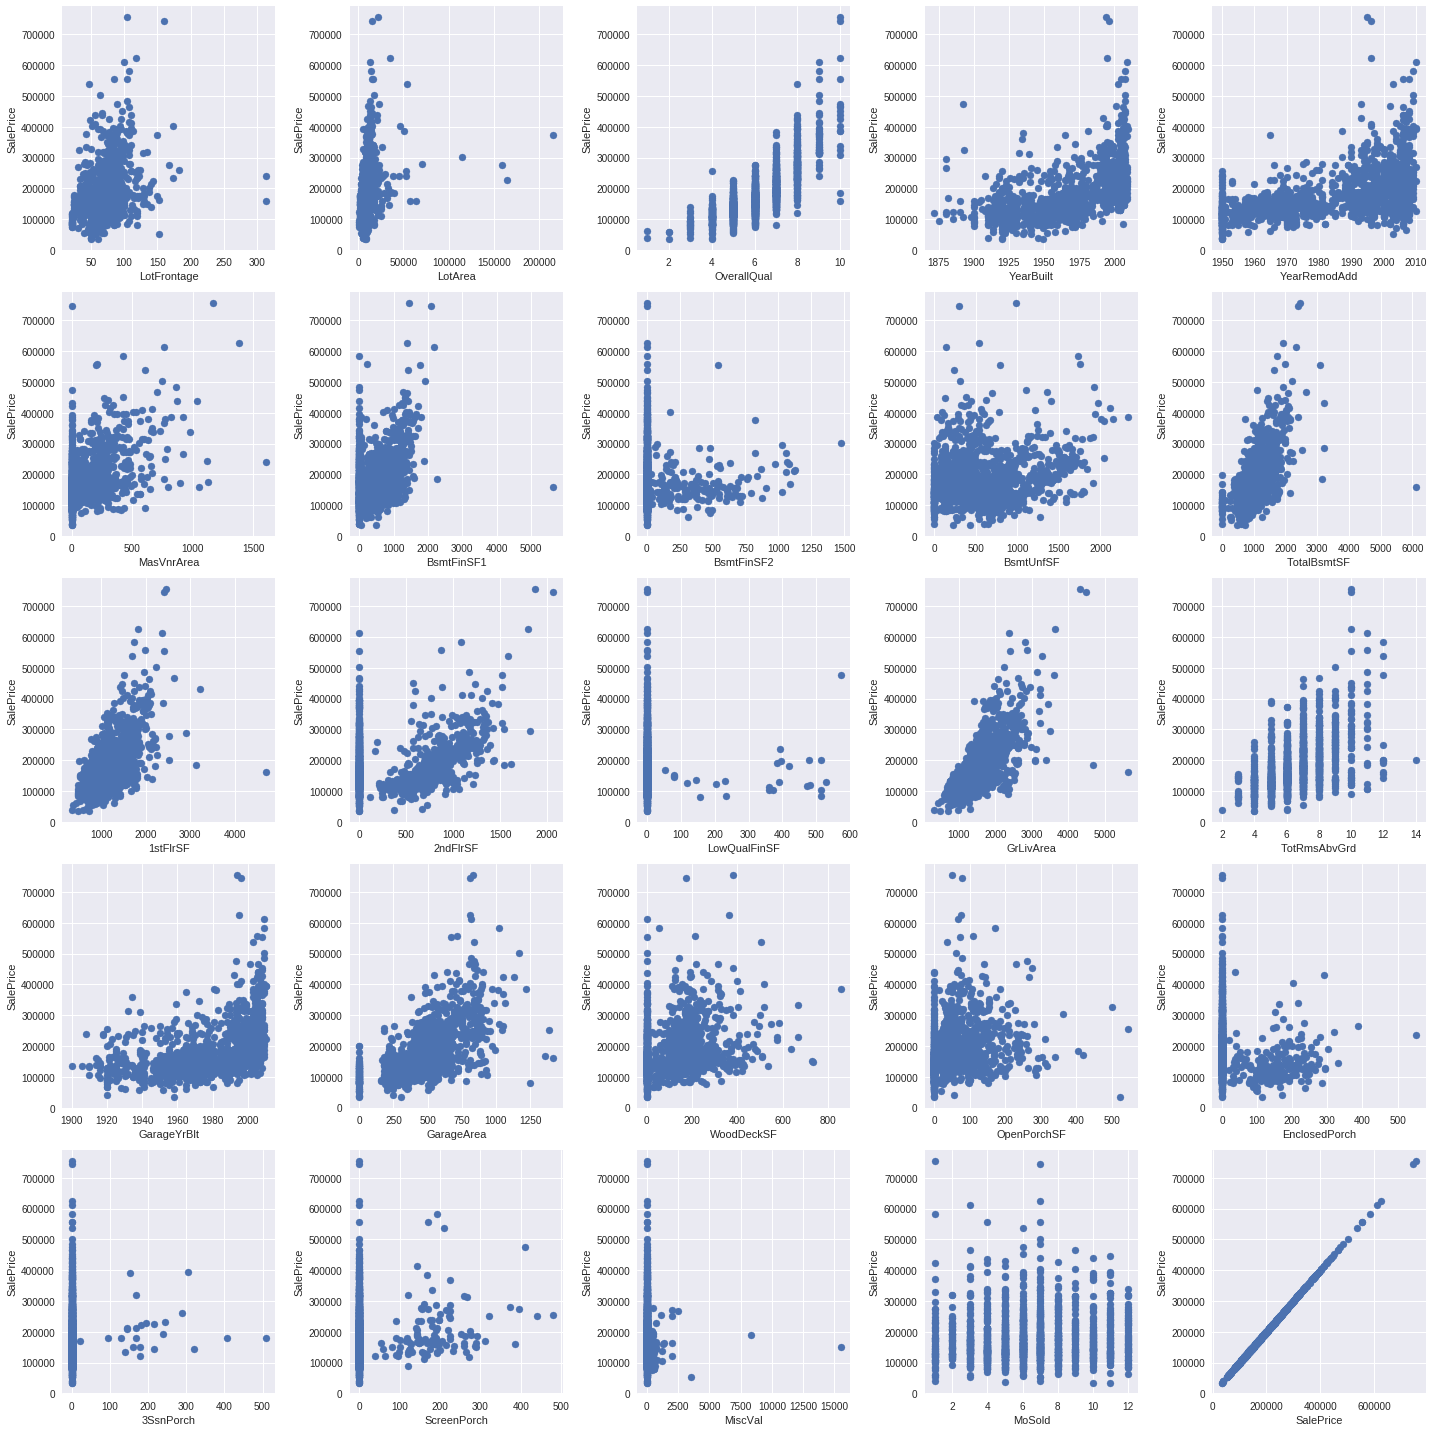

In [25]:
show_data_with_labels(SalePrice)

#### What are your observations? Add them to this markdown cell.
- Many fields are positively correlated with SalePrice, with varying strenghts of that correlation.
- 0 values galore...would skew an attempt at a regression line
---



### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [26]:
df_cat_clean = df_cat.copy()

In [27]:
for col in df_cat_clean:
    df_cat_clean[col].replace(to_replace = np.nan, value = 'nan', inplace = True)

In [28]:
len(df_cat_clean.columns)

55

In [29]:
df_cat_clean = pd.concat([df_cat_clean, SalePrice], axis = 1)

In [30]:
df_cat_clean.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [31]:
df_cat_clean.columns[:-1]

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
df_cat_clean.groupby('Fence')['SalePrice'].mean()

Fence
GdPrv    178927
GdWo     140379
MnPrv    148751
MnWw     134286
nan      187596
Name: SalePrice, dtype: int64

In [33]:
df_cat_clean.groupby('Fence')['SalePrice'].agg(np.mean)

Fence
GdPrv    178927
GdWo     140379
MnPrv    148751
MnWw     134286
nan      187596
Name: SalePrice, dtype: int64

In [34]:
def show_bar_plots(dataframe, column, plotx, ploty):
    fig, axes = plt.subplots(plotx, ploty, figsize=(20,30))
    columns = dataframe.columns[:-1]
    cols_index = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            col1 = columns[cols_index]
            means = dataframe.groupby(col1)[column].mean()
            errors = dataframe.groupby(col1)[column].std()
            means.plot.bar(yerr = errors, ax = ax)
            ax.set_xlabel(col1)
            ax.set_ylabel(column)
            cols_index += 1
    plt.tight_layout()
    fig.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


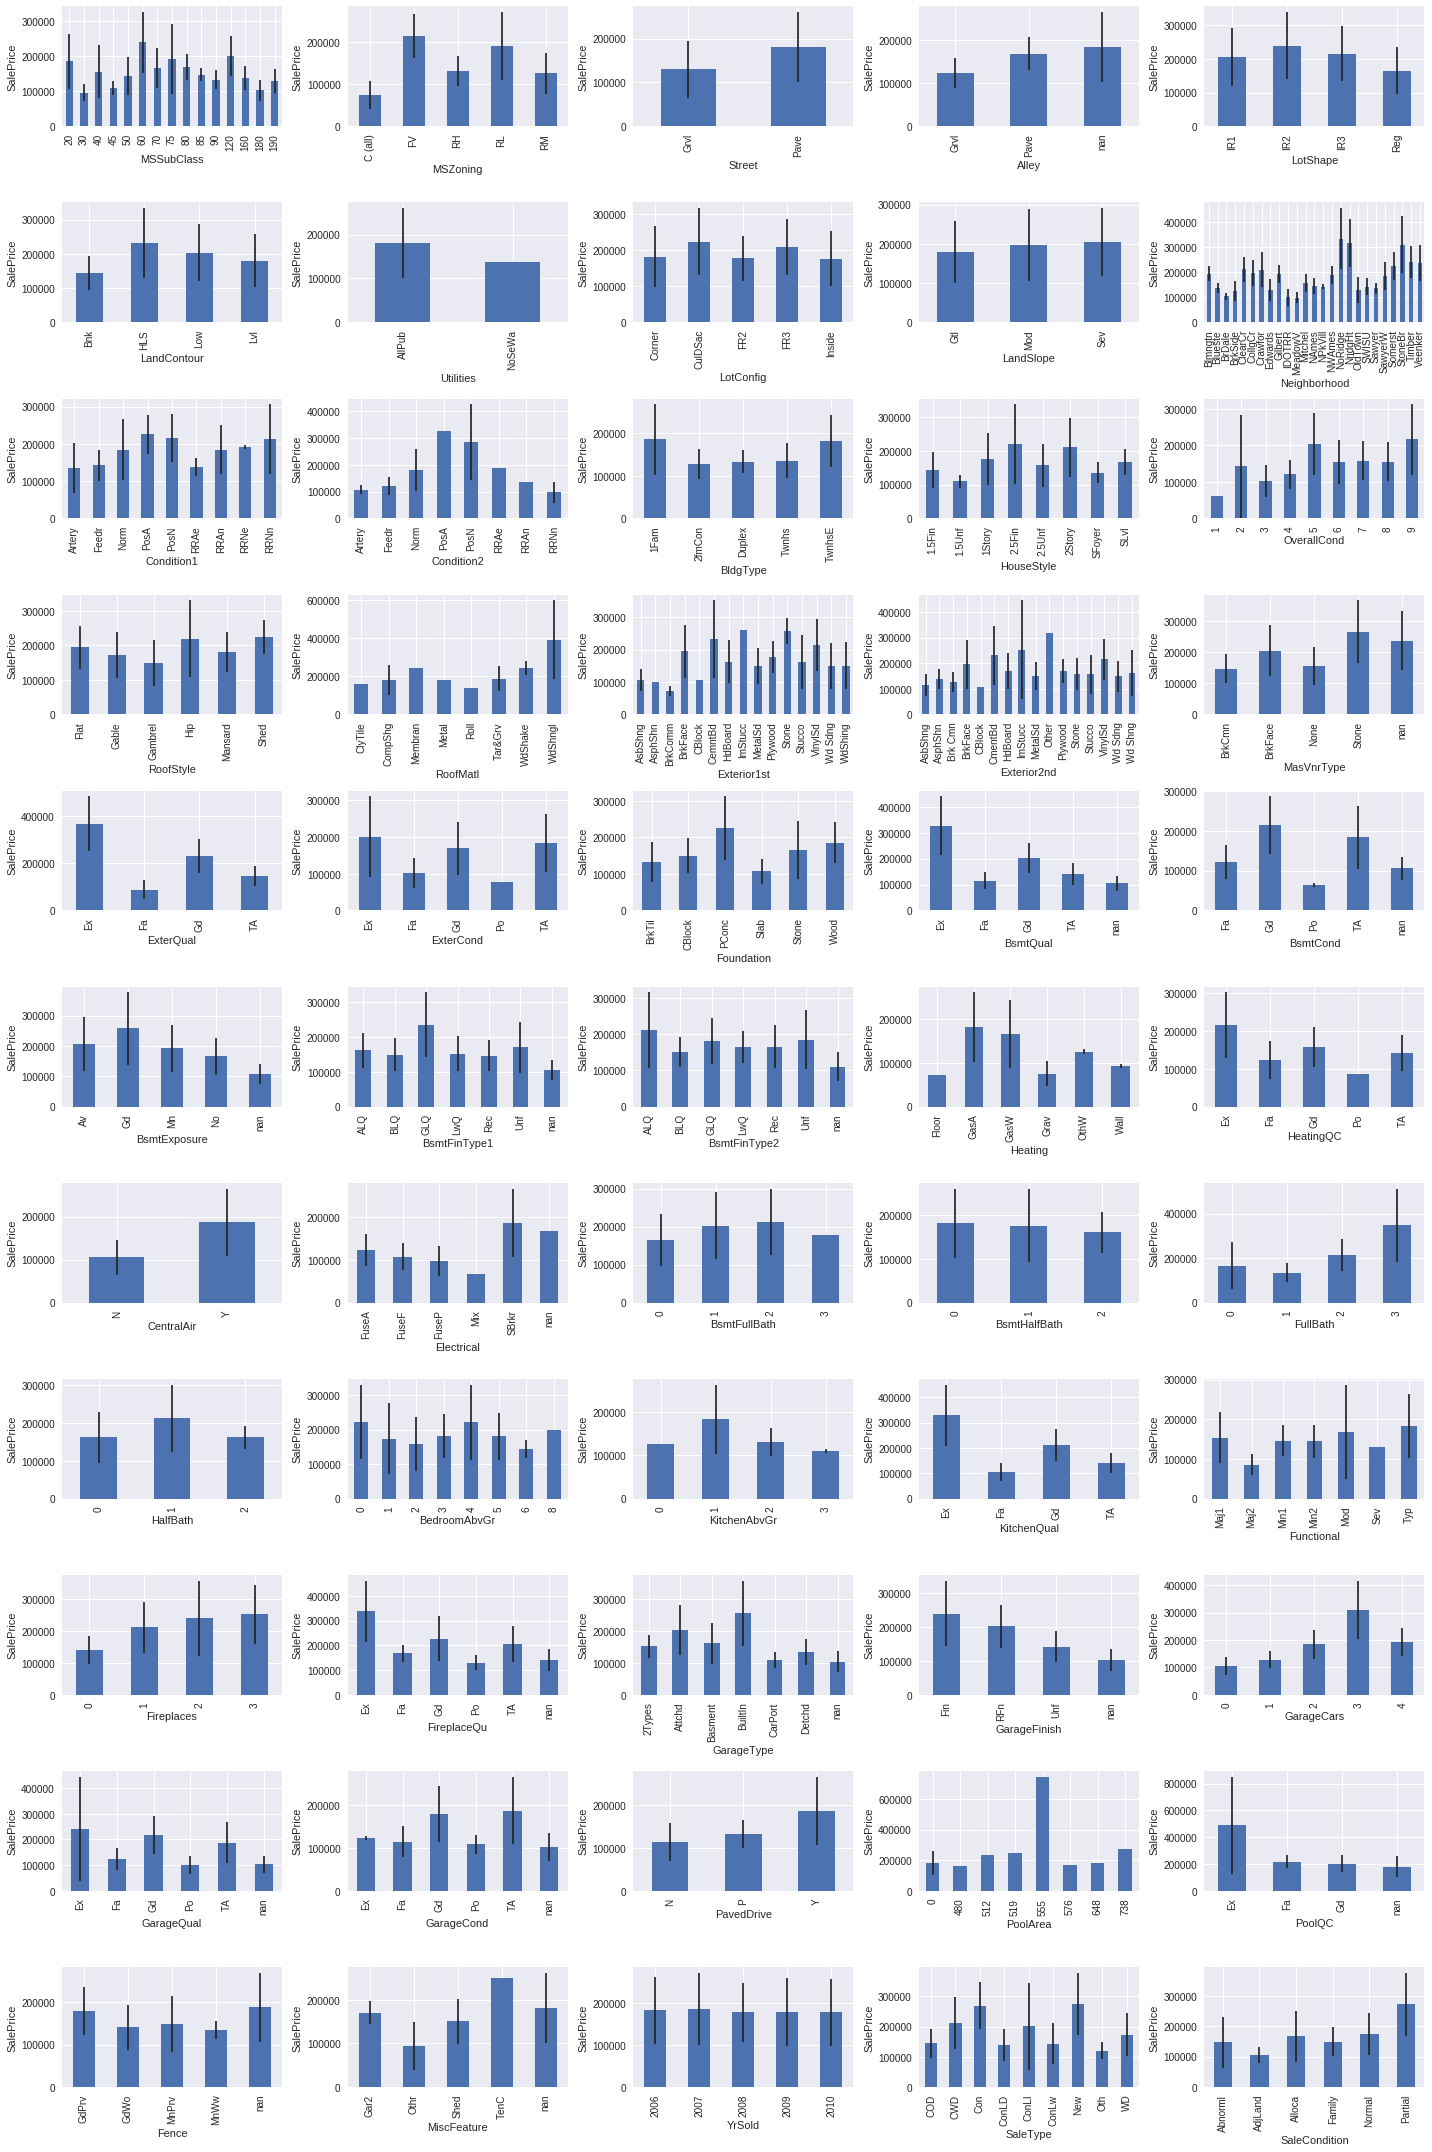

In [35]:
show_bar_plots(df_cat_clean, 'SalePrice', 11, 5)

#### What are your observations? Add them to this markdown cell.

The columns have a really large standard deviations. It also appears that the data is nicely distributed across the various categorical variables, suggesting that the data collection effectively targeted a diverse sample.

---



## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [36]:
quart1 = np.percentile(df['SalePrice'], 25)
quart3 = np.percentile(df['SalePrice'], 75)
print(quart1, quart3)

129975.0 214000.0


In [37]:
iqr = quart3 - quart1
iqr

84025.0

values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1) or equivalently, values below Q1-1.5 IQR or above Q3+1.5 IQR.

In [38]:
tukey_min = quart1 - 1.5*(quart3 - quart1)
tukey_max = quart3 + 1.5*(quart3 - quart1)

In [39]:
SalePrice_sans_outliers_lower = df['SalePrice'].quantile(q = .0015)
SalePrice_sans_outliers_upper = df['SalePrice'].quantile(q = .9985)

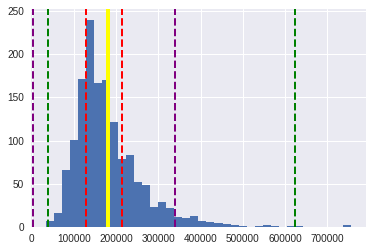

In [40]:
df['SalePrice'].hist(bins = int(np.sqrt(len(df['SalePrice']))))
plt.axvline(quart1, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(quart3, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(tukey_min, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.axvline(tukey_max, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.axvline(SalePrice_sans_outliers_lower, color = 'green', linestyle = 'dashed', linewidth = 2)
plt.axvline(SalePrice_sans_outliers_upper, color = 'green', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.mean(df['SalePrice']), color = 'yellow', linestyle = 'solid', linewidth = 4)

Tukey's method does not make sense due to the strong right skew of the histogram.
To maintain the skew but remove really bad outliers, I recommend using the middle 99.7% of data, as represented by the green dashed lines.

In [41]:
def values_with_range(dataframe, column, lower_bound, upper_bound):
    trim_lower = dataframe[column] >= lower_bound
    trim_upper = dataframe[column] <= upper_bound
    dataframe['Above_Lower'] = trim_lower
    dataframe['Below_Upper'] = trim_upper
    df_trim = dataframe[(dataframe['Above_Lower'] == True) & (dataframe['Below_Upper'] == True)]
    return df_trim

In [42]:
df_trim = values_with_range(df, 'SalePrice', SalePrice_sans_outliers_lower, SalePrice_sans_outliers_upper)

In [43]:
df_trim.shape

(1454, 82)

In [44]:
df.shape

(1460, 82)

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [45]:
df_trim.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Above_Lower,Below_Upper
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,True,True
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,True,True
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,True,True
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,True,True
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,True,True


In [46]:
null_cols = [column for column in df_trim.columns if (len(df_trim[column]) - df_trim[column].count()) != 0]

In [47]:
df_trim_nulls = pd.concat([df_trim[null_cols], df_trim['SalePrice']], axis = 1)
df_trim_nulls.head(2)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SalePrice
Id,,,,,,,,,,,,,,,,,,,,
1,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN,208500
2,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN,181500


In [48]:
df_trim_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 1 to 1460
Data columns (total 20 columns):
LotFrontage     1195 non-null float64
Alley           91 non-null object
MasVnrType      1446 non-null object
MasVnrArea      1446 non-null float64
BsmtQual        1417 non-null object
BsmtCond        1417 non-null object
BsmtExposure    1416 non-null object
BsmtFinType1    1417 non-null object
BsmtFinType2    1416 non-null object
Electrical      1453 non-null object
FireplaceQu     767 non-null object
GarageType      1375 non-null object
GarageYrBlt     1375 non-null float64
GarageFinish    1375 non-null object
GarageQual      1375 non-null object
GarageCond      1375 non-null object
PoolQC          6 non-null object
Fence           278 non-null object
MiscFeature     54 non-null object
SalePrice       1454 non-null int64
dtypes: float64(3), int64(1), object(16)
memory usage: 238.5+ KB


In [49]:
df_trim_nulls.get_dtype_counts()

float64     3
int64       1
object     16
dtype: int64

In [50]:
df_trim_nulls['MasVnrArea'].dtype == float

True

In [51]:
def show_bar_plots_null(df):
    dict_null_count = {}

    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            dict_null_count[col] = null_count

    x = np.arange(len(dict_null_count))
    y = dict_null_count.values()

    plt.bar(x, y)
    plt.xticks(x, dict_null_count.keys(), rotation='vertical')
    plt.show()

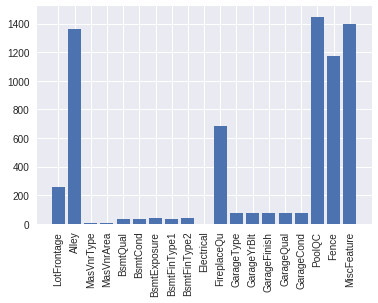

In [52]:
show_bar_plots_null(df_trim_nulls)

In [53]:
# def show_bar_plots_nulls(dataframe, column, plotx, ploty):
#     for col in dataframe:
#         if (col.dtype == 'float') | (col.dtype == 'int'):
#             if dataframe[col].isnull():
#                 dataframe[col] = 'nan'
#             else:
#                 dataframe[col] = 'not_nan'
#         else:
#             dataframe[col].replace(to_replace = np.nan, value = 'nan', inplace = True)
        
#     fig, axes = plt.subplots(plotx, ploty, figsize=(20,30))
#     columns = dataframe.columns[:-1]
#     cols_index = 0
    
#     for row in range(axes.shape[0]):
#         for col in range(axes.shape[1]):
#                 ax = axes[row][col]
#                 col1 = columns[cols_index]
#                 means = dataframe.groupby(col1)[column].mean()
#                 errors = dataframe.groupby(col1)[column].std()
#                 means.plot.bar(yerr = errors, ax = ax)
#                 ax.set_xlabel(col1)
#                 ax.set_ylabel(column)
#                 cols_index += 1
            
                
#     plt.tight_layout()
#     fig.show()

|   Fields   |   Null Meaning  |   Data Type   |
| -----------|:---------------:|--------------:|
| LotFrontage | Not Available | Float |
| Alley | No Alley Access | Object |
| MasVnrType | Not Available | Object |
| MasVnrArea | Not Available | Float |
| BsmtQual | No Basement | Object |
| BsmtCond | No Basement | Object |
| BsmtExposure | No Basement | Object |
| BsmtFinType1 | No Basement | Object |
| BsmtFinType2 | No Basement | Object |
| Electrical | Not Available | Object |
| FireplaceQu | No Fireplace | Object |
| GarageType | No Garage | Object |
| GarageYrBlt | No Garage | Float |
| GarageFinish | No Garage | Object |
| GarageQual | No Garage | Object |
| GarageCond | No Garage | Object |
| PoolQC | No Pool | Object |
| Fence | No Fence | Object |
| MiscFeature | No Misc Features | Object |

In [54]:
df_trim['LotFrontage'].replace(to_replace = np.nan, value = np.mean(df_trim['LotFrontage']), inplace = True)
df_trim['Alley'].replace(to_replace = np.nan, value = 'No Alley Access', inplace = True)
df_trim['MasVnrType'].replace(to_replace = np.nan, value = 'Not Available', inplace = True)
df_trim['MasVnrArea'].replace(to_replace = np.nan, value = np.mean(df_trim['MasVnrArea']), inplace = True)
df_trim['BsmtQual'].replace(to_replace = np.nan, value = 'No Basement', inplace = True)
df_trim['BsmtCond'].replace(to_replace = np.nan, value = 'No Basement', inplace = True)
df_trim['BsmtExposure'].replace(to_replace = np.nan, value = 'No Basement', inplace = True)
df_trim['BsmtFinType1'].replace(to_replace = np.nan, value = 'No Basement', inplace = True)
df_trim['BsmtFinType2'].replace(to_replace = np.nan, value = 'No Basement', inplace = True)
df_trim['Electrical'].replace(to_replace = np.nan, value = 'Not Available', inplace = True)
df_trim['FireplaceQu'].replace(to_replace = np.nan, value = 'No Fireplace', inplace = True)
df_trim['GarageType'].replace(to_replace = np.nan, value = 'No Garage', inplace = True)
df_trim['GarageYrBlt'].replace(to_replace = np.nan, value = np.mean(df_trim['GarageYrBlt']), inplace = True)
df_trim['GarageFinish'].replace(to_replace = np.nan, value = 'No Garage', inplace = True)
df_trim['GarageQual'].replace(to_replace = np.nan, value = 'No Garage', inplace = True)
df_trim['GarageCond'].replace(to_replace = np.nan, value = 'No Garage', inplace = True)
df_trim['PoolQC'].replace(to_replace = np.nan, value = 'No Pool', inplace = True)
df_trim['Fence'].replace(to_replace = np.nan, value = 'No Fence', inplace = True)
df_trim['MiscFeature'].replace(to_replace = np.nan, value = 'No Misc Features', inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Verify that you have *truly* eliminated all the null values!

In [55]:
for col in df_trim:
    assert df_trim[col].isnull().values.any() == False

In [56]:
df_trim.drop(['Above_Lower', 'Below_Upper', 'Alley', 'Fence', 'MiscFeature', 'PoolQC'], axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Dropped columns with lots of nulls

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [57]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 1 to 1460
Data columns (total 76 columns):
MSSubClass       1454 non-null object
MSZoning         1454 non-null object
LotFrontage      1454 non-null float64
LotArea          1454 non-null int64
Street           1454 non-null object
LotShape         1454 non-null object
LandContour      1454 non-null object
Utilities        1454 non-null object
LotConfig        1454 non-null object
LandSlope        1454 non-null object
Neighborhood     1454 non-null object
Condition1       1454 non-null object
Condition2       1454 non-null object
BldgType         1454 non-null object
HouseStyle       1454 non-null object
OverallQual      1454 non-null int64
OverallCond      1454 non-null int64
YearBuilt        1454 non-null int64
YearRemodAdd     1454 non-null int64
RoofStyle        1454 non-null object
RoofMatl         1454 non-null object
Exterior1st      1454 non-null object
Exterior2nd      1454 non-null object
MasVnrType       1454 n

In [58]:
df_trim.get_dtype_counts()

float64     3
int64      33
object     40
dtype: int64

In [59]:
df_mod = pd.get_dummies(df_trim) 

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [60]:
df_mod_corr = df_mod.corr()

df_mod_corr.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotFrontage,1.000000,0.303258,0.220411,-0.052993,0.112354,0.078290,0.169702,0.202440,0.044757,0.123904,...,-0.051976,0.129131,-0.023459,-0.092448,-0.026451,-0.037105,-0.017897,0.016454,-0.071891,0.127397
LotArea,0.303258,1.000000,0.098126,-0.005083,0.011055,0.011353,0.090034,0.209502,0.112153,-0.003193,...,-0.014951,0.020781,-0.005636,-0.003180,-0.028157,-0.013127,0.009197,-0.010546,0.004062,0.023394
OverallQual,0.220411,0.098126,1.000000,-0.096870,0.571083,0.549193,0.400975,0.226209,-0.059606,0.310762,...,-0.021397,0.332421,-0.058718,-0.228706,-0.095772,-0.042197,-0.045469,-0.025729,-0.153903,0.328252
OverallCond,-0.052993,-0.005083,-0.096870,1.000000,-0.378914,0.071543,-0.132201,-0.046345,0.039708,-0.138512,...,-0.019949,-0.157197,-0.050872,0.164934,-0.039746,-0.039087,-0.033713,-0.024179,0.158700,-0.152680
YearBuilt,0.112354,0.011055,0.571083,-0.378914,1.000000,0.590641,0.316920,0.246388,-0.049694,0.148541,...,-0.023592,0.347703,0.012095,-0.238743,-0.103025,-0.045825,-0.010269,-0.036073,-0.165868,0.344630


In [61]:
len(df_mod_corr.columns)

302

In [62]:
my_df = df_mod_corr[['SalePrice']]
my_df_abs = abs(my_df)
my_df_abs['SalePrice'].sort_values(ascending=False)

SalePrice                   1.000000
OverallQual                 0.794714
GrLivArea                   0.687463
GarageCars                  0.647824
GarageArea                  0.630573
TotalBsmtSF                 0.607576
ExterQual_TA                0.600367
1stFlrSF                    0.597944
FullBath                    0.552451
BsmtQual_Ex                 0.539769
YearBuilt                   0.535367
TotRmsAbvGrd                0.530247
KitchenQual_TA              0.529689
YearRemodAdd                0.521680
Foundation_PConc            0.505707
KitchenQual_Ex              0.497537
GarageYrBlt                 0.484639
FireplaceQu_No Fireplace    0.480295
ExterQual_Gd                0.465526
Fireplaces                  0.465356
BsmtQual_TA                 0.460224
MasVnrArea                  0.455508
ExterQual_Ex                0.453313
HeatingQC_Ex                0.440458
BsmtFinType1_GLQ            0.433853
Neighborhood_NridgHt        0.426116
GarageFinish_Unf            0.421747
G

In [63]:
y = df_mod['SalePrice']

In [64]:
cols_sel = [df_mod['OverallQual'], df_mod['GrLivArea'], df_mod['GarageCars'], df_mod['GarageArea'], 
           df_mod['TotalBsmtSF'], df_mod['ExterQual_TA'], df_mod['1stFlrSF'], df_mod['FullBath'], 
           df_mod['BsmtQual_Ex'], df_mod['YearBuilt'], df_mod['TotRmsAbvGrd'], df_mod['KitchenQual_TA'], 
           df_mod['YearRemodAdd'], df_mod['Foundation_PConc'], df_mod['KitchenQual_Ex'], df_mod['GarageYrBlt']]

In [65]:
X = pd.DataFrame(cols_sel).T

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

In [73]:
# from sklearn.feature_selection import SelectKBest, \
#                                       SelectFromModel, \
#                                       RFE, SelectPercentile
# from sklearn.linear_model import Lasso

In [74]:
# sfm = SelectFromModel(estimator = Lasso(), threshold = 'median')

In [75]:
# sfm.fit(Xs_train, y_train)

In [76]:
# sfm_feats = np.where(sfm.get_support())[0]
# len(sfm_feats)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [77]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [78]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

In [79]:
example_results

[{'dataset': 'train',
  'name': 'test1',
  'preprocessing': 'raw',
  'score': '1 bajillion'},
 {'dataset': 'train',
  'name': 'test1',
  'preprocessing': 'scaled',
  'score': '20 bajillion'}]

Then we pass the results list to pass to a DataFrame.

In [80]:
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [81]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [82]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [83]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [84]:
benchmark_scaled = LinearRegression()
benchmark_scaled.fit(Xs_train, y_train)

scaled_train_score = benchmark_scaled.score(Xs_train, y_train)
scaled_test_score = benchmark_scaled.score(Xs_test, y_test)

In [85]:
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [86]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.796895
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.833628
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.796895
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.833628


#### What are your observations? Add them to this markdown cell. ###

The R2 score on the test data is really small, either really close to 0 (training data) or very negative (test data). This means that linear regression is not a good model for our data.



### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [87]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

**Ridge**

In [88]:
ridge_raw = Ridge()

In [89]:
ridge_raw.fit(X_train, y_train)

ridge_raw_train_score = ridge_raw.score(X_train, y_train)
ridge_raw_test_score = ridge_raw.score(X_test, y_test)

In [90]:
results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_raw_train_score})
results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_raw_test_score})

In [91]:
ridge_scaled = Ridge()

In [92]:
ridge_scaled.fit(Xs_train, y_train)

ridge_scaled_train_score = ridge_scaled.score(Xs_train, y_train)
ridge_scaled_test_score = ridge_scaled.score(Xs_test, y_test)

In [93]:
results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridge_scaled_train_score})
results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridge_scaled_test_score})

**Lasso**

In [94]:
lasso_raw = Lasso()

In [95]:
lasso_raw.fit(X_train, y_train)

lasso_raw_train_score = lasso_raw.score(X_train, y_train)
lasso_raw_test_score = lasso_raw.score(X_test, y_test)

In [96]:
results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_raw_train_score})
results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_raw_test_score})

In [97]:
lasso_scaled = Lasso()

In [98]:
lasso_scaled.fit(Xs_train, y_train)

lasso_scaled_train_score = lasso_scaled.score(Xs_train, y_train)
lasso_scaled_test_score = lasso_scaled.score(Xs_test, y_test)

In [99]:
results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lasso_scaled_train_score})
results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lasso_scaled_test_score})

**ElasticNet**

In [100]:
en_raw = ElasticNet()

In [101]:
en_raw.fit(X_train, y_train)

en_raw_train_score = en_raw.score(X_train, y_train)
en_raw_test_score = en_raw.score(X_test, y_test)

In [102]:
results.append({'name':'elastic net',
                'model':en_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': en_raw_train_score})
results.append({'name':'elastic net',
                'model':en_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': en_raw_test_score})

In [103]:
en_scaled = ElasticNet()

In [104]:
en_scaled.fit(Xs_train, y_train)

en_scaled_train_score = en_scaled.score(Xs_train, y_train)
en_scaled_test_score = en_scaled.score(Xs_test, y_test)

In [105]:
results.append({'name':'elastic net',
                'model':en_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': en_scaled_train_score})
results.append({'name':'elastic net',
                'model':en_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': en_scaled_test_score})

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [106]:
results_df = pd.DataFrame(results)

#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [107]:
results_df[(results_df.preprocessing == 'raw') & 
          (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.833628
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.833780
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.833643
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,0.823860


#### What are your observations? Add them to this markdown cell.

All scores of 1.0

---



#### Display just the scaled test results

In [108]:
results_df[(results_df.preprocessing == 'scaled') & 
          (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.833628
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.833594
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.833626
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,0.811965


#### What are your observations? Add them to this markdown cell.

High scores, all above .9, with elastic net as lowest and ridge as highest.

---



These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [109]:
results_df[(results_df.name == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.796895
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.833628
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.796895
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.833628


#### Display just the Ridge models

In [110]:
results_df[(results_df.name == 'ridge')]

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.796891
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.833780
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.796895
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.833594


#### Display just the Lasso models

In [111]:
results_df[(results_df.name == 'lasso')]

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.796895
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.833643
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.796895
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.833626


#### Display just the Elasticnet models

In [112]:
results_df[(results_df.name == 'elastic net')]

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,0.764245
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,0.823860
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,0.783854
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,0.811965


#### What are your observations? Add them to this markdown cell.

The raw data gives scores of 1.0 across the board. When scaled, we get scores over .9 where the test score is slighty lower than the training score.

---



### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [113]:
cv_results = list()

In [114]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

** RidgeCV **

In [115]:
ridgecv_raw = RidgeCV(alphas=np.logspace(-2,4,7), cv = 5)

ridgecv_raw.fit(X_train, y_train)
ridgecv_raw_train_score = ridgecv_raw.score(X_train, y_train)
ridgecv_raw_test_score = ridgecv_raw.score(X_test, y_test)

In [116]:
cv_results.append({'name':'ridge',
                'model':ridgecv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridgecv_raw_train_score})
cv_results.append({'name':'ridge',
                'model':ridgecv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridgecv_raw_test_score})

In [117]:
ridgecv_scaled = RidgeCV(alphas=np.logspace(-2,4,7), cv = 5)

ridgecv_scaled.fit(Xs_train, y_train)
ridgecv_scaled_train_score = ridgecv_scaled.score(Xs_train, y_train)
ridgecv_scaled_test_score = ridgecv_scaled.score(Xs_test, y_test)

In [118]:
cv_results.append({'name':'ridge',
                'model':ridgecv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridgecv_scaled_train_score})
cv_results.append({'name':'ridge',
                'model':ridgecv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridgecv_scaled_test_score})

** LassoCV **

In [119]:
lassocv_raw = LassoCV(alphas=np.logspace(-2,4,7), cv = 5)

lassocv_raw.fit(X_train, y_train)
lassocv_raw_train_score = lassocv_raw.score(X_train, y_train)
lassocv_raw_test_score = lassocv_raw.score(X_test, y_test)

In [120]:
cv_results.append({
    'name': 'lasso',
    'model': lassocv_raw,
    'dataset': 'train',
    'preprocessing': 'raw',
    'score': lassocv_raw_train_score
})
cv_results.append({
    'name': 'lasso',
    'model': lassocv_raw,
    'dataset': 'test',
    'preprocessing': 'raw',
    'score': lassocv_raw_test_score
})

In [121]:
lassocv_scaled = LassoCV(alphas=np.logspace(-2,4,7), cv = 5)

lassocv_scaled.fit(Xs_train, y_train)
lassocv_scaled_train_score = lassocv_scaled.score(Xs_train, y_train)
lassocv_scaled_test_score = lassocv_scaled.score(Xs_test, y_test)

In [122]:
cv_results.append({
    'name': 'lasso',
    'model': lassocv_scaled,
    'dataset': 'train',
    'preprocessing': 'scaled',
    'score': lassocv_scaled_train_score
})
cv_results.append({
    'name': 'lasso',
    'model': lassocv_scaled,
    'dataset': 'test',
    'preprocessing': 'scaled',
    'score': lassocv_scaled_test_score
})

** ElasticNet **

In [123]:
encv_raw = ElasticNetCV(alphas=np.logspace(-2,4,7), cv = 5)

encv_raw.fit(X_train, y_train)
encv_raw_train_score = encv_raw.score(X_train, y_train)
encv_raw_test_score = encv_raw.score(X_test, y_test)

In [124]:
cv_results.append({
    'name': 'elastic net',
    'model': encv_raw,
    'dataset': 'train',
    'preprocessing': 'raw',
    'score': encv_raw_train_score
})
cv_results.append({
    'name': 'elastic net',
    'model': encv_raw,
    'dataset': 'test',
    'preprocessing': 'raw',
    'score': encv_raw_test_score
})

In [125]:
encv_scaled = ElasticNetCV(alphas = np.logspace(-2,4,7), cv = 5)

encv_scaled.fit(X_train, y_train)
encv_scaled_train_score = encv_scaled.score(X_train, y_train)
encv_scaled_test_score = encv_scaled.score(X_test, y_test)

In [126]:
cv_results.append({
    'name': 'elastic net',
    'model': encv_scaled,
    'dataset': 'train',
    'preprocessing': 'scaled',
    'score': encv_scaled_train_score
})
cv_results.append({
    'name': 'elastic net',
    'model': encv_scaled,
    'dataset': 'test',
    'preprocessing': 'scaled',
    'score': encv_scaled_test_score
})

In [127]:
cv_results_df = pd.DataFrame(cv_results)

#### Display just the raw test results

In [128]:
cv_results_df[(cv_results_df.preprocessing == 'raw') & 
          (cv_results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.833780
5,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,0.833628
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,0.834372


#### Display just the scaled test results

In [129]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
             (cv_results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.829664
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.832454
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,0.834372


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [130]:
from sklearn.metrics import r2_score

In [131]:
results_df['name'].unique()

array(['benchmark', 'ridge', 'lasso', 'elastic net'], dtype=object)

In [132]:
cv_results_df[(cv_results_df.dataset == 'train')].sort_values('score', axis = 0, ascending = False)

,dataset,model,name,preprocessing,score
4,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,0.796895
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.796891
8,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,0.796768
10,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,0.796768
2,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.795566
6,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.795374


In [133]:
cv_results_df[(cv_results_df.dataset == 'test')].sort_values('score', axis = 0, ascending = False)

,dataset,model,name,preprocessing,score
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,0.834372
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,0.834372
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,0.833780
5,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,0.833628
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.832454
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.829664


Lasso Raw, Lasso Scaled, and Ridge Raw were my top three performing models against the test data.

## Attempt at more efficient code for creating a dataframe with y_hats and R2 scores

In [134]:
# models = [ridge_raw, ridge_scaled, ridgecv_raw, ridgecv_scaled, lasso_raw, lasso_scaled, 
#          lassocv_raw, lassocv_scaled, en_raw, en_scaled, encv_raw, encv_scaled]

# model_names = ['ridge_raw', 'ridge_scaled', 'ridgecv_raw', 'ridgecv_scaled', 'lasso_raw', 'lasso_scaled', 
#          'lassocv_raw', 'lassocv_scaled', 'en_raw', 'en_scaled', 'encv_raw', 'encv_scaled']

# models_df = pd.DataFrame()

In [135]:
# y_hats = []

# for i, model in enumerate(models):
#     for j, model_name in enumerate(model_names):
#         if 'cv' in model_name:
#             y_hats.append(((model.predict(Xs_test)), model_name, model))
#         else:
#             y_hats.append(((model.predict(X_test)), model_name, model))

In [136]:
# models_df = pd.DataFrame(y_hats)

# models_df.columns = ['y_hats', 'model_name', 'model']

In [137]:
# models_df.shape

In [138]:
# models_df.head()

## Working method for getting y_hats and r2 scores

In [139]:
# ridge_raw_yhat = ridge_raw.predict(X_test)
# ridge_scaled_yhat = ridge_scaled.predict(Xs_test)
# ridgecv_raw_yhat = ridgecv_raw.predict(X_test)
# ridgecv_scaled_yhat = ridgecv_scaled.predict(Xs_test)
# lasso_raw_yhat = lasso_raw.predict(X_test)
# lasso_scaled_yhat = lasso_scaled.predict(Xs_test)
# lassocv_raw_yhat = lassocv_raw.predict(X_test)
# lassocv_scaled_yhat = lassocv_scaled.predict(Xs_test)
# en_raw_yhat = en_raw.predict(X_test)
# en_scaled_yhat = en_scaled.predict(Xs_test)
# encv_raw_yhat = encv_raw.predict(X_test)
# encv_scaled_yhat = encv_scaled.predict(Xs_test)

In [140]:
# r2_scores = {}

# r2_scores['ridge_raw_r2'] = r2_score(y_test, ridge_raw_yhat)
# r2_scores['ridge_scaled_r2'] = r2_score(y_test, ridge_scaled_yhat)
# r2_scores['ridgecv_raw_r2'] = r2_score(y_test, ridgecv_raw_yhat)
# r2_scores['ridgecv_scaled_r2'] = r2_score(y_test, ridgecv_scaled_yhat)
# r2_scores['lasso_raw_r2'] = r2_score(y_test, lasso_raw_yhat)
# r2_scores['lasso_scaled_r2'] = r2_score(y_test, lasso_scaled_yhat)
# r2_scores['lassocv_raw_r2'] = r2_score(y_test, lassocv_raw_yhat)
# r2_scores['lassocv_scaled_r2'] = r2_score(y_test, lassocv_scaled_yhat)
# r2_scores['en_raw_r2'] = r2_score(y_test, en_raw_yhat)
# r2_scores['en_scaled_r2'] = r2_score(y_test, en_scaled_yhat)
# r2_scores['encv_raw_r2'] = r2_score(y_test, encv_raw_yhat)
# r2_scores['encv_scaled_r2'] = r2_score(y_test, encv_scaled_yhat)

In [141]:
# r2_scores_sorted = [(model, r2_scores[model]) for model in sorted(r2_scores, key=r2_scores.get, reverse = True)]

In [142]:
# r2_scores_sorted

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

The regularized models perform better on the test data because regularization function is optimizing the model, specifically the betas, by minimizing the error. It is quantitatively the best predictor of new data (test data) that we can make given the available predictors/features. What this does is finds beta values for the model that has the lowest combination of bias and variance, meaning that it is good but not too fit on the training data (low bias) and predicts the test data pretty well (low variance).

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [143]:
def plot_coef(model, top_n = 8):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_8 = pd.DataFrame(zipped).head(top_n)
    bottom_8 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_8, bottom_8], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

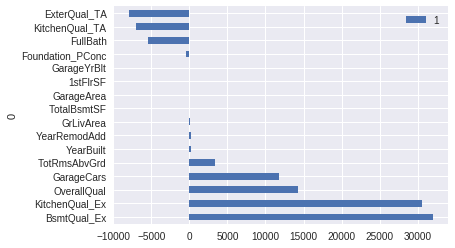

In [145]:
plot_coef(encv_scaled)

#### Which features add / take away most value from a home?

Using the top 16 correlated features to SalePrice...Excellent Basement Quality, Excellent Kitchen Quality, Overall Quality, and Number of Cars fit in Garage are strong predictors for High Salesprice. Average Kitchen Quality and Average Exterior Material Quality are strong predictors of low price. 

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)